In [303]:
import pandas as pd

df_barueri = pd.read_csv('./donation_req/donation_requisition_barueri.csv')
df_jabaquara = pd.read_csv('./donation_req/donation_requisition_jabaquara.csv')
dps_barueri = pd.read_csv('./donation_req/studio_results_barueri.csv')
dps_jabaquara = pd.read_csv('./donation_req/studio_results_jabaquara.csv')

In [304]:
def convert_date_only(columns, df):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.date

In [305]:
df_barueri.drop(axis=0, columns=['note', 'start_time', 'end_time'], inplace=True)
df_jabaquara.drop(axis=0, columns=['note', 'start_time', 'end_time'], inplace=True)

dps_barueri.drop(axis=0, columns=['created_at', 'updated_at', 'donor_id'], inplace=True)
dps_jabaquara.drop(axis=0, columns=['created_at', 'updated_at', 'donor_id'], inplace=True)

In [306]:
df_barueri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   status_id   143 non-null    int64 
 1   created_at  143 non-null    object
 2   updated_at  143 non-null    object
 3   donor_id    143 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


In [307]:
df_jabaquara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   status_id   127 non-null    int64 
 1   created_at  127 non-null    object
 2   updated_at  127 non-null    object
 3   donor_id    127 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.1+ KB


In [308]:
dps_barueri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 179 non-null    object
 1   status             179 non-null    object
 2   receiver_id        179 non-null    object
 3   collected_at       179 non-null    object
 4   has_invoice_photo  179 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 5.9+ KB


In [309]:
dps_jabaquara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 151 non-null    object
 1   status             151 non-null    object
 2   receiver_id        151 non-null    object
 3   collected_at       151 non-null    object
 4   has_invoice_photo  151 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 5.0+ KB


Total de solicitações para barueri

In [310]:
df_barueri['donor_id'].count()

143

Total de solicitações para Jabaquara

In [311]:
df_jabaquara['donor_id'].count()

127

Total de coletas para barueri

In [312]:
dps_barueri['id'].count()

179

Total de coletas para jabaquara

In [313]:
dps_jabaquara['id'].count()

151

In [314]:
columns_drs = [ 'created_at', 'updated_at']
columns_dps = ['collected_at']

In [315]:
convert_date_only(columns_drs, df_barueri)
convert_date_only(columns_drs, df_jabaquara)
convert_date_only(columns_dps, dps_barueri)
convert_date_only(columns_dps, dps_jabaquara)

In [316]:
df_jabaquara.head()

,status_id,created_at,updated_at,donor_id
0,4,2025-07-21,2025-07-21,4df6b828-3159-4095-801f-67ab5f896fc3
1,4,2025-07-23,2025-07-23,4df6b828-3159-4095-801f-67ab5f896fc3
2,4,2025-07-18,2025-07-18,4df6b828-3159-4095-801f-67ab5f896fc3
3,4,2025-07-16,2025-07-16,4df6b828-3159-4095-801f-67ab5f896fc3
4,4,2025-05-28,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3


In [317]:
df_jabaquara = df_jabaquara.sort_values('created_at')
dps_jabaquara = dps_jabaquara.sort_values('collected_at')

jab_merged_df = pd.merge(
    df_jabaquara,
    dps_jabaquara,
    left_on='created_at',
    right_on='collected_at',
    how='inner'  # or 'left' if you want all from df_jabaquara
)

# distinct_dates_df = jab_merged_df.drop_duplicates(subset=['created_at'])

In [318]:
df_barueri = df_barueri.sort_values('created_at')
dps_barueri = dps_barueri.sort_values('collected_at')

bar_merged_df = pd.merge(
    df_barueri,
    dps_barueri,
    left_on='created_at',
    right_on='collected_at',
    how='inner'  # or 'left' if you want all from df_jabaquara
)

In [319]:
jab_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   status_id          122 non-null    int64 
 1   created_at         122 non-null    object
 2   updated_at         122 non-null    object
 3   donor_id           122 non-null    object
 4   id                 122 non-null    object
 5   status             122 non-null    object
 6   receiver_id        122 non-null    object
 7   collected_at       122 non-null    object
 8   has_invoice_photo  122 non-null    bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 7.9+ KB


In [320]:
bar_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   status_id          149 non-null    int64 
 1   created_at         149 non-null    object
 2   updated_at         149 non-null    object
 3   donor_id           149 non-null    object
 4   id                 149 non-null    object
 5   status             149 non-null    object
 6   receiver_id        149 non-null    object
 7   collected_at       149 non-null    object
 8   has_invoice_photo  149 non-null    bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 9.6+ KB


In [321]:
bar_merged_df.sort_values('created_at').head(10)

,status_id,created_at,updated_at,donor_id,id,status,receiver_id,collected_at,has_invoice_photo
0,4,2025-05-20,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,527ad765-42c6-41fc-8561-60b6caf03ee1,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-20,True
1,4,2025-05-21,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,98b78f4b-7670-4e96-919e-12bf34d653e9,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,False
2,4,2025-05-21,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,54d57a80-dd26-46f9-b4f4-69c9c00ce142,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,True
3,4,2025-05-22,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,fe86c162-f181-493b-ab47-87e9a9a0cb33,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-22,True
4,4,2025-05-23,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,256882dd-79ca-4894-97b6-c2abf0736b70,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-23,True
5,4,2025-05-24,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,0e821ed1-329b-4a07-8daf-bc4fb911e121,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-24,True
6,4,2025-05-26,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,60d4f2ef-6e99-4595-8f16-7fc844f5c96e,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-26,True
7,4,2025-05-27,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,a9e4755e-3049-4ae6-b9c9-94f872d527da,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-27,True
8,4,2025-05-28,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,b94ec054-d133-4381-9148-4adb4fa929c4,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-28,True
9,4,2025-05-29,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,a466cfb3-985c-4816-80d8-bb76970ddda8,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-29,True


In [322]:
jab_merged_df.sort_values('created_at').tail(10)

,status_id,created_at,updated_at,donor_id,id,status,receiver_id,collected_at,has_invoice_photo
112,4,2025-11-04,2025-11-04,4df6b828-3159-4095-801f-67ab5f896fc3,e9ee91bd-5f33-41a1-aba7-9558ad8f6af1,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-04,False
113,1,2025-11-07,2025-11-07,4df6b828-3159-4095-801f-67ab5f896fc3,82ddd7f9-a02f-4e96-91f8-8e3d8afa40d2,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-07,True
114,4,2025-11-08,2025-11-08,4df6b828-3159-4095-801f-67ab5f896fc3,5042757a-b496-46bd-912f-4a868d7d4099,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-08,False
115,4,2025-11-11,2025-11-11,4df6b828-3159-4095-801f-67ab5f896fc3,72b8aee2-770b-439c-99e3-e80338fa9b70,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-11,False
116,2,2025-11-13,2025-11-13,4df6b828-3159-4095-801f-67ab5f896fc3,28205672-0132-4f2e-9035-468b94830c4a,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-13,True
117,4,2025-11-21,2025-11-21,4df6b828-3159-4095-801f-67ab5f896fc3,879d8b00-a87b-458c-9269-a082c986a2f2,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-21,False
118,4,2025-11-25,2025-11-25,4df6b828-3159-4095-801f-67ab5f896fc3,f26fa438-f9c5-4d44-9e08-ace362f8aa91,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-25,False
119,4,2025-11-27,2025-11-27,4df6b828-3159-4095-801f-67ab5f896fc3,861b3a53-dc4f-44da-b802-464b2cabd54f,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-27,False
120,4,2025-11-28,2025-11-28,4df6b828-3159-4095-801f-67ab5f896fc3,10eaa1c6-3328-4d77-8664-997139db1104,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-28,False
121,1,2025-12-01,2025-12-01,4df6b828-3159-4095-801f-67ab5f896fc3,1a79ef64-91b9-4b6d-b162-16f66367cb83,canceled,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-12-01,False


In [323]:
bar_merged_df[bar_merged_df['has_invoice_photo'] == False]

,status_id,created_at,updated_at,donor_id,id,status,receiver_id,collected_at,has_invoice_photo
1,4,2025-05-21,2025-07-24,7c2166f9-688b-40c6-8f2f-55113a223be4,98b78f4b-7670-4e96-919e-12bf34d653e9,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,False
60,4,2025-07-31,2025-07-31,7c2166f9-688b-40c6-8f2f-55113a223be4,788c4fbd-b980-4382-a456-af821cb5f2a5,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-07-31,False
82,4,2025-09-01,2025-09-01,7c2166f9-688b-40c6-8f2f-55113a223be4,e3c1a5ff-62c3-46bc-ad95-c968a1e4d30b,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-09-01,False
92,4,2025-09-16,2025-09-16,7c2166f9-688b-40c6-8f2f-55113a223be4,a498e725-ce02-40f3-b0e7-951f62a20557,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-09-16,False
129,1,2025-11-03,2025-11-03,7c2166f9-688b-40c6-8f2f-55113a223be4,473cd64f-25c7-47c0-8c1d-453200d9194e,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-03,False
132,1,2025-11-03,2025-11-03,7c2166f9-688b-40c6-8f2f-55113a223be4,473cd64f-25c7-47c0-8c1d-453200d9194e,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-03,False
141,3,2025-11-17,2025-11-17,7c2166f9-688b-40c6-8f2f-55113a223be4,e8029b60-60b8-4ee8-a25e-0171a8bef0ae,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-17,False


In [324]:
def monthly_donations_per_month(df, id, column):
    dict_month = {}
    months = [ 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro' ]
    for i, month in enumerate(months, start=5):
        start_date = pd.Timestamp(year=2025, month=i, day=1)

        if i < 12:
            end_date = pd.Timestamp(year=2025, month=i + 1, day=1)
        else:
            end_date = pd.Timestamp(year=2026, month=1, day=1)

        month_df = df[(df[column] >= start_date.date()) & (df[column] < end_date.date()) & (df['status'] == 'closed')].sort_values(by=column, ascending=True)
        dict_month[month] = month_df[id].count()

        print(month, dict_month[month])
        print()

    total = 0

    for month in  dict_month:
        total += dict_month[month]

    dict_month['Total'] = total
    print('Total de coletas no mês feitas pela ONG:', total)

    return dict_month


In [325]:
def monthly_donations_per_month_mvp_registered(df, id, column):
    dict_month = {}
    months = [ 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro' ]
    for i, month in enumerate(months, start=5):
        start_date = pd.Timestamp(year=2025, month=i, day=1)

        if i < 12:
            end_date = pd.Timestamp(year=2025, month=i + 1, day=1)
        else:
            end_date = pd.Timestamp(year=2026, month=1, day=1)

        month_df = df[(df[column] >= start_date.date()) & (df[column] < end_date.date()) & (df['has_invoice_photo'] == False)].sort_values(by=column, ascending=True)
        dict_month[month] = month_df[id].count()

        print(month, dict_month[month])
        print()

    total = 0

    for month in  dict_month:
        total += dict_month[month]

    dict_month['Total'] = total
    print('Total de coletas no mês feitas pela ONG:', total)

    return dict_month

In [326]:
dps_jabaquara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 150
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 151 non-null    object
 1   status             151 non-null    object
 2   receiver_id        151 non-null    object
 3   collected_at       151 non-null    object
 4   has_invoice_photo  151 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 6.0+ KB


In [327]:
barueri_donations_per_month = monthly_donations_per_month(dps_barueri, 'id', 'collected_at')

Maio 16

Junho 20

Julho 28

Agosto 27

Setembro 25

Outubro 26

Novembro 21

Dezembro 2

Total de coletas no mês feitas pela ONG: 165


In [328]:
jabaquara_donations_per_month = monthly_donations_per_month(dps_jabaquara, 'id', 'collected_at')

Maio 13

Junho 18

Julho 22

Agosto 19

Setembro 18

Outubro 15

Novembro 11

Dezembro 0

Total de coletas no mês feitas pela ONG: 116


In [329]:
barueri_requisitions_per_month_per_mvp = monthly_donations_per_month(bar_merged_df, 'id', 'created_at')

Maio 10

Junho 22

Julho 28

Agosto 19

Setembro 19

Outubro 22

Novembro 18

Dezembro 1

Total de coletas no mês feitas pela ONG: 139


In [330]:
jabaquara_requisitions_per_month_mvp = monthly_donations_per_month(jab_merged_df, 'id', 'created_at')

Maio 11

Junho 18

Julho 22

Agosto 15

Setembro 14

Outubro 15

Novembro 9

Dezembro 0

Total de coletas no mês feitas pela ONG: 104


In [331]:
barueri_donations_per_month_per_mvp_registered = monthly_donations_per_month_mvp_registered(bar_merged_df, 'id', 'created_at')

Maio 1

Junho 0

Julho 1

Agosto 0

Setembro 2

Outubro 0

Novembro 3

Dezembro 0

Total de coletas no mês feitas pela ONG: 7


In [332]:
jabaquara_donations_per_month_mvp_registered = monthly_donations_per_month_mvp_registered(jab_merged_df, 'id', 'created_at')

Maio 0

Junho 4

Julho 17

Agosto 14

Setembro 6

Outubro 7

Novembro 7

Dezembro 1

Total de coletas no mês feitas pela ONG: 56


In [333]:
import matplotlib.pyplot as plt

# Suppose your dictionary is like this:
# my_dict = {'Maio': 10, 'Junho': 15, 'Julho': 7, ...}

# Remove 'Total' if present
def plot_donations_per_month(donations_dict, color, label=None):
    data = {k: v for k, v in donations_dict.items() if k != 'Total'}

    plt.figure(figsize=(10, 6))
    plt.bar(data.keys(), data.values(), color=color)
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.title(label if label else 'Doações por mês')
    plt.xticks(rotation=45)
    for y in plt.gca().get_yticks():
        plt.axhline(y, color='black', linestyle='--', linewidth=0.5, alpha=0.8)
    plt.show()

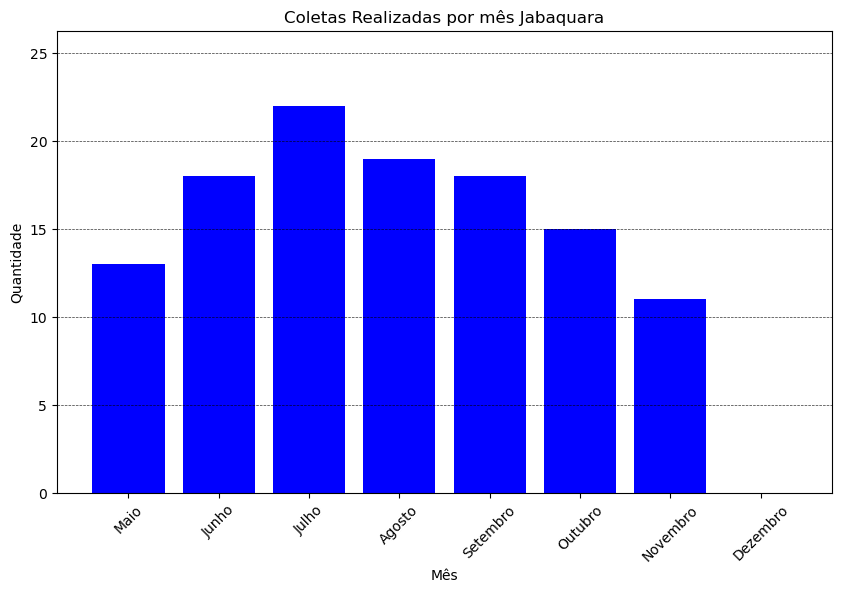

In [378]:
plot_donations_per_month(jabaquara_donations_per_month, 'blue', 'Coletas Realizadas por mês Jabaquara')

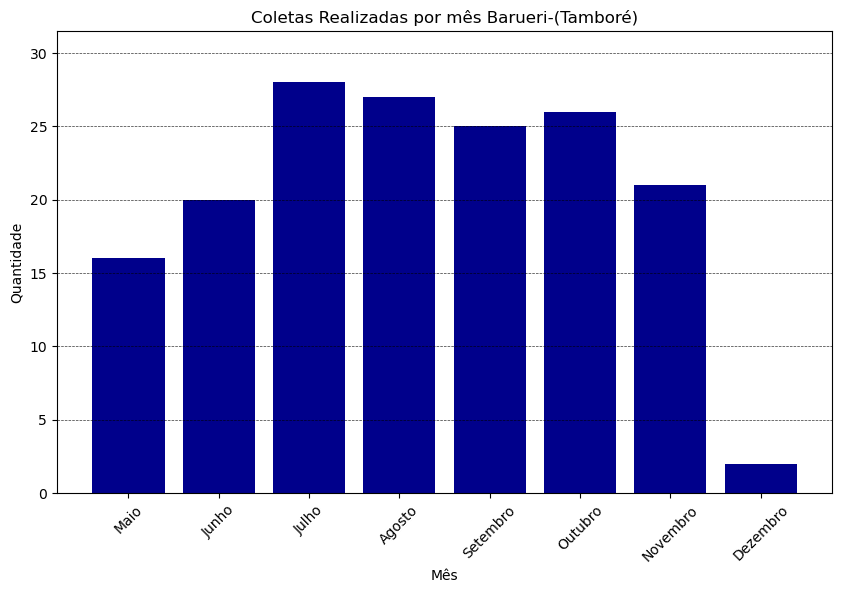

In [377]:
plot_donations_per_month(barueri_donations_per_month, 'darkblue', 'Coletas Realizadas por mês Barueri-(Tamboré)')

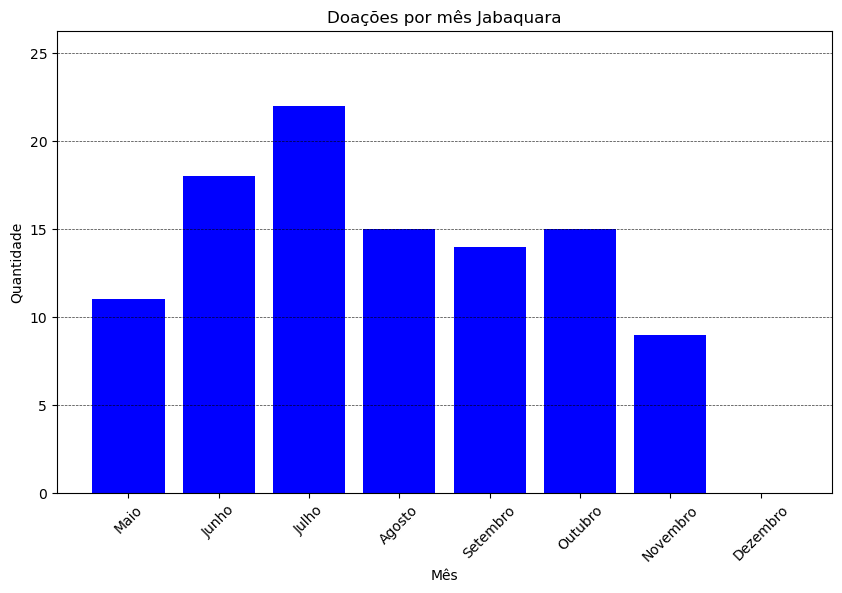

In [334]:
plot_donations_per_month(jabaquara_requisitions_per_month_mvp, 'blue', 'Doações por mês Jabaquara')

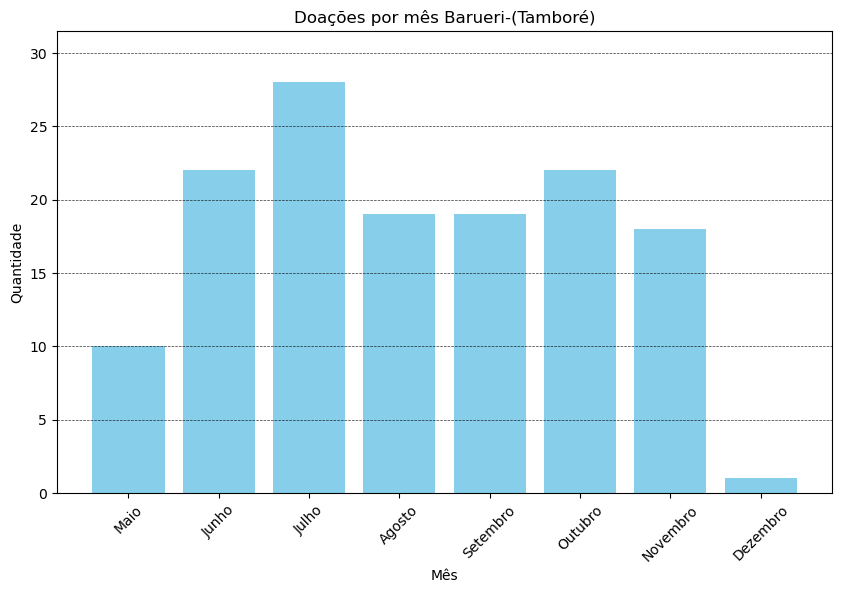

In [376]:
plot_donations_per_month(barueri_requisitions_per_month_per_mvp, 'skyblue', 'Doações por mês Barueri-(Tamboré)')

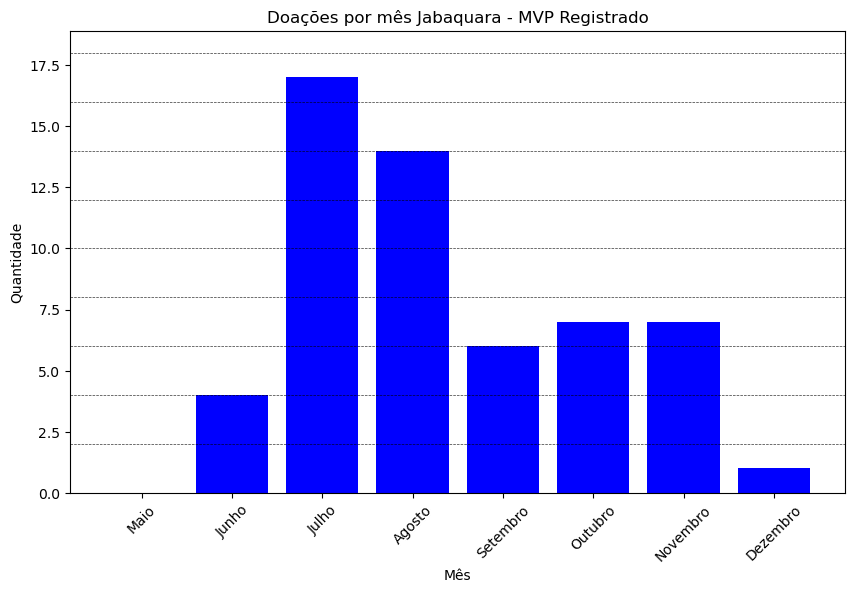

In [373]:
plot_donations_per_month(jabaquara_donations_per_month_mvp_registered, 'blue', 'Doações por mês Jabaquara - MVP Registrado')

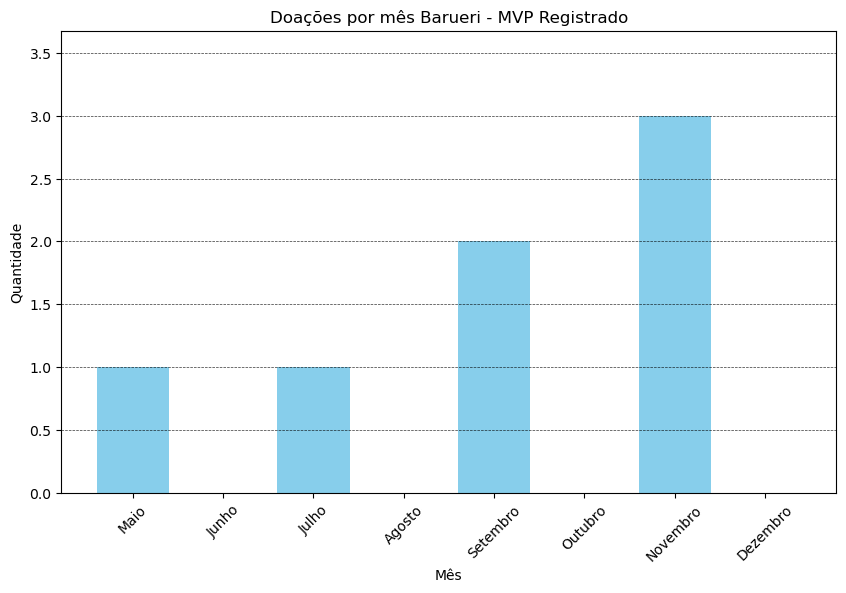

In [375]:
plot_donations_per_month(barueri_donations_per_month_per_mvp_registered, 'skyblue', 'Doações por mês Barueri - MVP Registrado')


In [336]:
df_jabaquara_raw = pd.read_csv('./donation_req/studio_results_jabaquara.csv')
df_barueri_raw = pd.read_csv('./donation_req/studio_results_barueri.csv')

df_jabaquara_raw = df_jabaquara_raw.drop(axis=0, columns=['status', 'receiver_id', 'donor_id', 'has_invoice_photo'])
df_barueri_raw = df_barueri_raw.drop(axis=0, columns=['status', 'receiver_id', 'donor_id', 'has_invoice_photo'])

In [337]:
jab_merged_df = jab_merged_df.merge(df_jabaquara_raw, on='id', how='inner',  suffixes=('', '_full'))
bar_merged_df = bar_merged_df.merge(df_barueri_raw, on='id', how='inner',  suffixes=('', '_full'))

In [338]:
jab_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   status_id          122 non-null    int64 
 1   created_at         122 non-null    object
 2   updated_at         122 non-null    object
 3   donor_id           122 non-null    object
 4   id                 122 non-null    object
 5   status             122 non-null    object
 6   receiver_id        122 non-null    object
 7   collected_at       122 non-null    object
 8   has_invoice_photo  122 non-null    bool  
 9   collected_at_full  122 non-null    object
 10  created_at_full    122 non-null    object
 11  updated_at_full    122 non-null    object
dtypes: bool(1), int64(1), object(10)
memory usage: 10.7+ KB


In [358]:
jab_merged_df.head()

,status_id,created_at,updated_at,donor_id,id,status,receiver_id,collected_at,has_invoice_photo,collected_at_full,created_at_full,updated_at_full,time_diff,time_diff_hours,time_diff_minutes
0,4,2025-05-13,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3,7d9b7a62-0caf-41f0-8bb7-2a6df21ca19c,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-13,True,2025-05-13 19:30:00+00:00,2025-05-13 21:16:20.549205+00:00,2025-05-13 21:27:02.099082+00:00,0 days 01:46:20.549205,1.772375,106.342487
1,4,2025-05-20,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3,a55fff22-8f66-4889-8998-5a0b1d55b1a3,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-20,True,2025-05-20 20:00:00+00:00,2025-05-20 20:36:06.219728+00:00,2025-05-20 20:42:10.291699+00:00,0 days 00:36:06.219728,0.601728,36.103662
2,4,2025-05-21,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3,b6bfe1a8-69a1-45d8-8b46-c605f66bc0d3,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-21,True,2025-05-21 19:00:00+00:00,2025-05-22 12:19:03.025598+00:00,2025-05-22 12:30:24.989758+00:00,0 days 17:19:03.025598,17.317507,1039.050427
3,4,2025-05-22,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3,069691fb-4795-4419-906a-8043fce9679f,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-22,True,2025-05-22 20:00:00+00:00,2025-05-23 10:30:37.212531+00:00,2025-05-23 10:38:02.896903+00:00,0 days 14:30:37.212531,14.510337,870.620209
4,4,2025-05-23,2025-07-15,4df6b828-3159-4095-801f-67ab5f896fc3,f1c1a30d-0bbd-4a5e-a2de-e9c973a42356,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-23,True,2025-05-23 19:30:00+00:00,2025-05-26 22:31:13.637353+00:00,2025-05-26 23:29:07.150343+00:00,3 days 03:01:13.637353,75.020455,4501.227289


In [359]:
jab_merged_df['time_diff'].head()

0   0 days 01:46:20.549205
1   0 days 00:36:06.219728
2   0 days 17:19:03.025598
3   0 days 14:30:37.212531
4   3 days 03:01:13.637353
Name: time_diff, dtype: timedelta64[ns]

In [360]:
# Convert to datetime if needed
jab_merged_df['created_at_full'] = pd.to_datetime(jab_merged_df['created_at_full'])
jab_merged_df['updated_at_full'] = pd.to_datetime(jab_merged_df['updated_at_full'])
jab_merged_df['collected_at_full'] = pd.to_datetime(jab_merged_df['collected_at_full'])


# Calculate the difference
jab_merged_df['time_diff'] =  jab_merged_df['created_at_full'] - jab_merged_df['collected_at_full']
jab_merged_df['time_diff_hours'] = round(jab_merged_df['time_diff'].dt.total_seconds() / 3600, 1)
jab_merged_df['time_diff_minutes'] = round(jab_merged_df['time_diff'].dt.total_seconds() / 60, 1)

In [357]:
jab_merged_df['time_diff'].mean()

Timedelta('1 days 11:32:55.556376950')

In [362]:
jab_merged_df['time_diff_hours'].mean()

35.55

In [363]:
jab_merged_df['time_diff_minutes'].mean()

2132.9196721311478

In [367]:
# Convert to datetime if needed
bar_merged_df['created_at_full'] = pd.to_datetime(bar_merged_df['created_at_full'])
bar_merged_df['updated_at_full'] = pd.to_datetime(bar_merged_df['updated_at_full'])
bar_merged_df['collected_at_full'] = pd.to_datetime(bar_merged_df['collected_at_full'])


# Calculate the difference
bar_merged_df['time_diff'] =  bar_merged_df['created_at_full'] - bar_merged_df['collected_at_full']
bar_merged_df['time_diff_hours'] = round(bar_merged_df['time_diff'].dt.total_seconds() / 3600, 1)
bar_merged_df['time_diff_minutes'] = round(bar_merged_df['time_diff'].dt.total_seconds() / 60, 1)



In [368]:
bar_merged_df['time_diff'].mean()

Timedelta('0 days 02:46:50.993307577')

In [369]:
bar_merged_df['time_diff_hours'].mean()

2.78255033557047

In [370]:
bar_merged_df['time_diff_minutes'].mean()

166.84966442953018